# Principal Component Analysis

 - 一个非监督的机器学习算法　　
 - 用于数据的降维
 - 其它应用：可视化；去噪
 
 *梯度上升法有很强的数学原理支持。有兴趣可以自己查阅。*

|||
|-|-|
| <img src="./photo/pca1.png" width = "350" height = "350" alt="knn" align=center />|<img src="./photo/pca2.png" width = "350" height = "350" alt="knn" align=center />|
|<img src="./photo/pc3.png" width = "350" height = "350" alt="knn" align=center />|<img src="./photo/pca4.png" width = "350" height = "350" alt="knn" align=center />|

最大化方程　<img src="./photo/gradient1.png" width = "500" height = "50" alt="knn" align=center />

|||
|-|-|
|<img src="./photo/gradient2.png" width = "300" height = "500" alt="knn" align=center />|<img src="./photo/gradient3.png" width = "500" height = "500" alt="knn" align=center />|

## 梯度上升法实现PCA

### 求第一个主成分

In [6]:
def demean(X):
    return X - np.mean(X, axis=0)
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w):
    return w / np.linalg.norm(w) # 求向量的模，单位化向量ｗ，推到公式中ｗ为单位向量

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

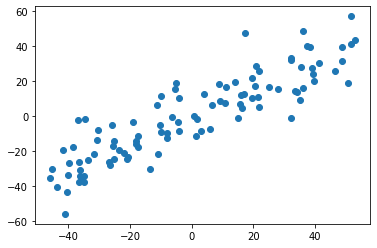

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))

X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)
X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [16]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始，没办法更新，f df都为０
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据，标准化之后，方差为１
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.7750193 , 0.63193756])

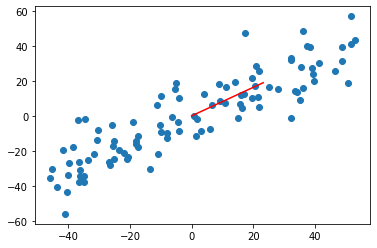

In [17]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

### 如何求下一个主成分

求出一个主成分之后，将数据在第一个主成分上的分量去掉

<img src="./photo/next_pca.png" width = "500" height = "500" alt="knn" align=center />

In [19]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])# 初始化w
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w 
        
    return res

In [20]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.7804322 , 0.62524042])

In [21]:
pca = first_n_components(4, X)
pca

[array([0.7750188 , 0.63193818]),
 array([-0.63193662,  0.77502007]),
 array([0.87328224, 0.48721466]),
 array([0.66644389, 0.74555519])]

In [28]:
pca[0].dot(pca[1])

2.0136526878156147e-06

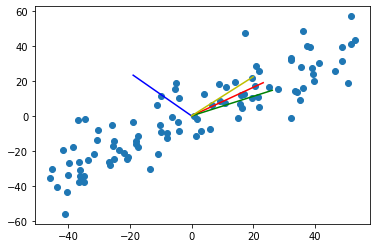

In [27]:
plt.scatter(X_demean[:,0], X_demean[:,1])

for i,a in enumerate(pca):
    
    color = ['r','b','g','y']
    plt.plot([0, a[0]*30], [0, a[1]*30], color=color[i])
# plt.axis([-60,60,-60,60])
plt.show()

## PCA 从高维到低维的映射

### sklearn 中的pca

In [30]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.components_

array([[ 0.76319937,  0.64616308],
       [-0.64616308,  0.76319937]])

In [37]:
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

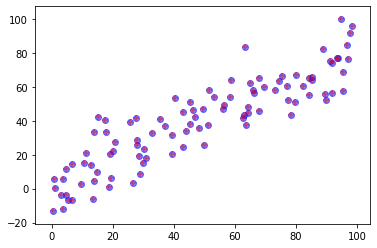

In [42]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5,marker='+')
plt.show()

### digits数据集

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

X_train.shape

(1347, 64)

In [44]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 39.4 ms, sys: 2.16 ms, total: 41.6 ms
Wall time: 270 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [47]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 1.61 ms, sys: 7.35 ms, total: 8.96 ms
Wall time: 6.1 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

## 主成分解释的方差

In [49]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [50]:
pca.explained_variance_

array([175.90066519, 165.86177754])

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

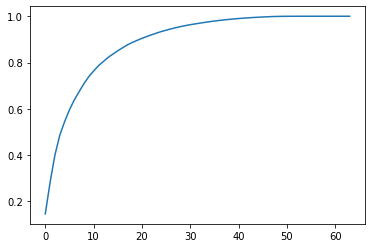

In [52]:
# 主成分个数和保留方差比例关系
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

#### 降维之后的数据进行训练，速度换准确率

In [53]:
pca = PCA(0.95)
pca.fit(X_train)
pca.n_components_

28

In [54]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [55]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 6.29 ms, sys: 711 µs, total: 7 ms
Wall time: 5.24 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
knn_clf.score(X_test_reduction, y_test)

0.98

## 使用PCA对数据进行降维可视化

In [57]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

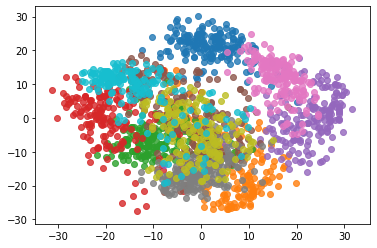

In [58]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.8)
plt.show()

## 降维的过程可以理解成去噪

In [59]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [60]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [61]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [62]:
example_digits.shape

(100, 64)

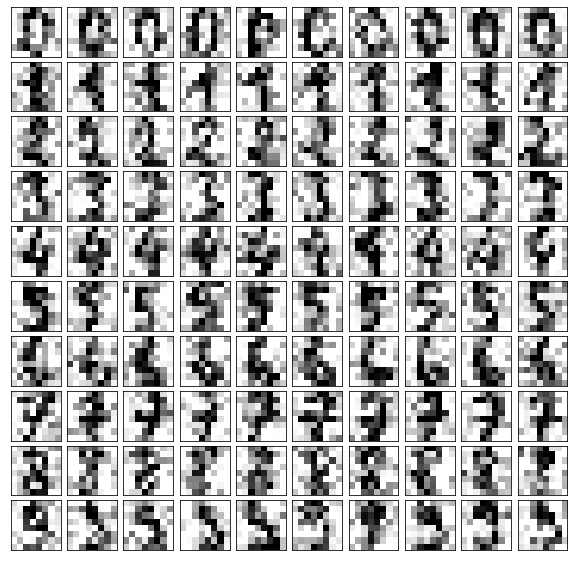

In [63]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [72]:
pca = PCA(0.5).fit(noisy_digits)
pca.n_components_

12

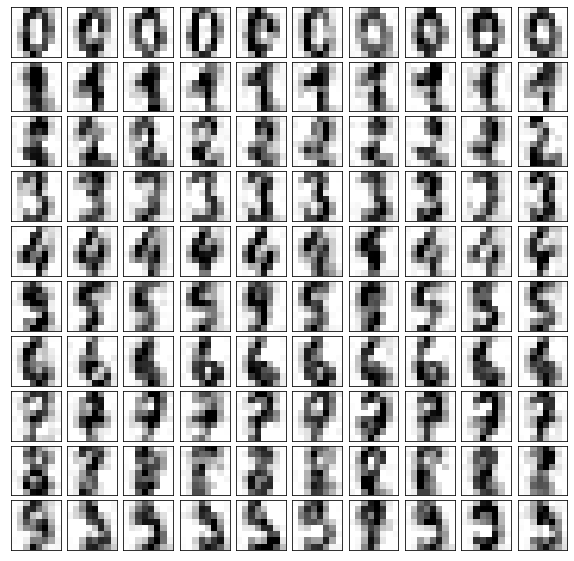

In [73]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

## 三维数据点

In [94]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# 在三维空间随机生成100个样本点
np.random.seed(8888)
X_random = np.random.random(size=(100, 3))

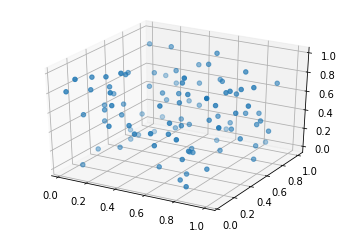

In [95]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_random[:,0], X_random[:,1], X_random[:,2])
plt.show()

In [107]:
pca = PCA(n_components=2)
pca.fit(X_random)
X_reduction = pca.transform(X_random)
X_reduction.shape

(100, 2)

In [108]:
x_restore = pca.inverse_transform(X_reduction)
x_restore.shape
pca.explained_variance_ratio_

array([0.38452624, 0.32392531])

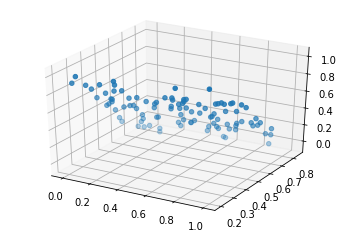

In [109]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_restore[:,0], x_restore[:,1], x_restore[:,2])
plt.show()